<a href="https://colab.research.google.com/github/kudith/SIC5_technical_assignment_2/blob/main/technical_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIC 5 | Technical Assignment 2

- **Nama: Ginanjar Aditiya Prianata**
- **Kelompok: 24**



---



In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ai4i2020.csv')


# Check dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [37]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop unnecessary columns
data = df.drop(columns=['Product ID'])

# One-hot encoding
data = pd.get_dummies(data, dtype="int")

# Define features and target
X = data.drop(columns=['Machine failure'])
y = data['Machine failure']



UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [38]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,-1.731878,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,-0.333889,-1.224745,1.528617
1,-1.731531,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,-0.333889,0.816497,-0.654186
2,-1.731185,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,-0.333889,0.816497,-0.654186
3,-1.730838,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,-0.333889,0.816497,-0.654186
4,-1.730492,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,-0.333889,0.816497,-0.654186


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Define the model with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1937
           1       1.00      0.98      0.99        63

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1937    0]
 [   1   62]]


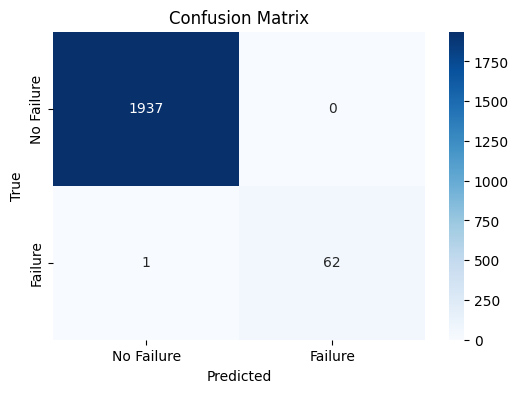

In [40]:
# Visualization

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

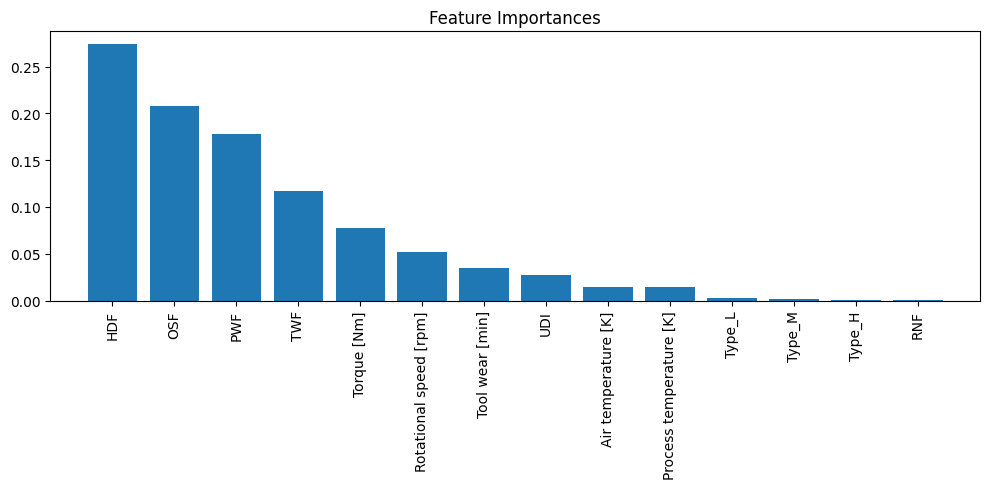

In [41]:

# Feature Importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [42]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Random Forest Best Model Accuracy: {accuracy:.4f}")
print("Random Forest Classification Report:\n", classification_rep)
print("Random Forest Confusion Matrix:\n", conf_matrix)
print(f"Random Forest ROC AUC Score: {roc_auc:.2f}")

Random Forest Best Model Accuracy: 0.9995
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1937
           1       1.00      0.98      0.99        63

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Confusion Matrix:
 [[1937    0]
 [   1   62]]
Random Forest ROC AUC Score: 0.99
